# SVM Segmentation

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import io

In [2]:
img = io.imread('Images/test2.jpg')

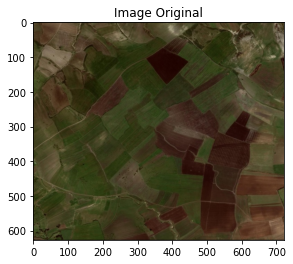

In [3]:
plt.title("Image Original")
plt.imshow(img)
plt.show()

In [4]:
# SVM

from sklearn.svm import SVC

In [5]:
## test 1:
## classes = {'arbres': 0, 'vegetation': 1, 'sable': 2}

## test 2:
classes = {'terre fetilisé': 0, 'terre rocheuse': 1 ,'végétation': 2 }

In [6]:
rows, cols, bands = img.shape
n_classes = len(classes)
palette = np.uint8([[255, 0, 0], [0, 0, 255], [0, 255, 0]])

In [7]:
X = img.reshape(rows*cols, bands)

In [8]:
svm_seg = n_classes*np.ones(shape=(rows, cols), dtype=np.int)

In [9]:
## test 1:
'''
svm_seg[180:200, 0:20] = classes['arbres']
svm_seg[0:20, 400:420] = classes['vegetation']
svm_seg[400:420, 380:400] = classes['sable']
'''

## test 2:

svm_seg[100:120, 380:400] = classes['terre fetilisé']
svm_seg[130:150, 290:310] = classes['végétation']
svm_seg[80:100, 40:60] = classes['terre rocheuse']


In [10]:
y = svm_seg.ravel()
train = np.flatnonzero(svm_seg < n_classes)
test = np.flatnonzero(svm_seg == n_classes)

In [11]:
classifier = SVC(gamma='scale' , C=0.00000001)
classifier.fit(X[train], y[train])
y[test] = classifier.predict(X[test])
svm_seg = y.reshape(rows, cols)

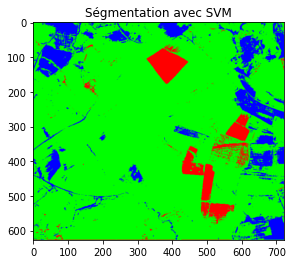

In [12]:
plt.title("Ségmentation avec SVM")
plt.imshow(palette[svm_seg])
plt.show()

# K-Means Segmentation

In [13]:
# K-Means

from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=n_classes, random_state=2).fit(X)
kmeans_seg = kmeans.labels_.reshape(rows, cols)

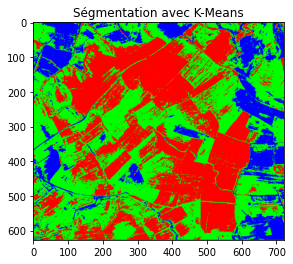

In [15]:
plt.title("Ségmentation avec K-Means")
plt.imshow(palette[kmeans_seg])
plt.show()

# Multi-Otsu Thresholding

In [16]:
# Multi-Otsu

import cv2
from skimage.filters import threshold_multiotsu

In [18]:
# The input image with gray scale
image = cv2.imread('Images/test2.jpg',cv2.IMREAD_GRAYSCALE)

In [19]:
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

In [20]:
# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

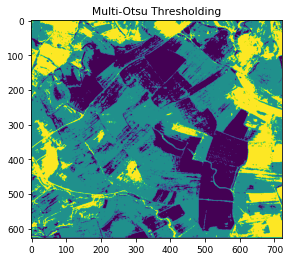

In [21]:
plt.title("Multi-Otsu Thresholding")
plt.imshow(regions)
plt.show()

# Sobel Filter

In [22]:
# SOBEL

from PIL import Image

In [23]:
# Open the image
img = np.array(Image.open('Images/test2.jpg')).astype(np.uint8)

In [24]:
# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

In [25]:
# Sobel Operator
h, w = gray_img.shape

In [26]:
# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

In [27]:
# define images with 0s
newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

In [28]:
# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

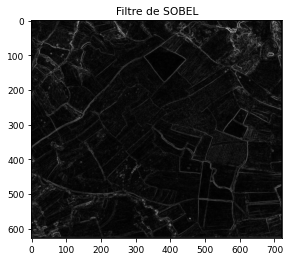

In [29]:
plt.title("Filtre de SOBEL")
plt.imshow(newgradientImage, cmap='gray')
plt.show()

# Prewitt Filter

In [30]:
# PREWITT

# Open the image
img = np.array(Image.open('Images/test2.jpg')).astype(np.uint8)

In [31]:
# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

In [32]:
# Prewitt Operator
h, w = gray_img.shape

In [33]:
# define filters
horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

In [34]:
# define images with 0s
newgradientImage = np.zeros((h, w))

In [35]:
# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

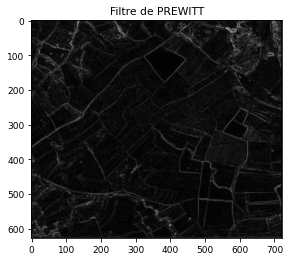

In [36]:
plt.title('Filtre de PREWITT')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

# Canny Filter

In [37]:
# Canny

# Open the image
img = cv2.imread('Images/test2.jpg')

In [38]:
# Apply Canny
edges = cv2.Canny(img, 100, 200)

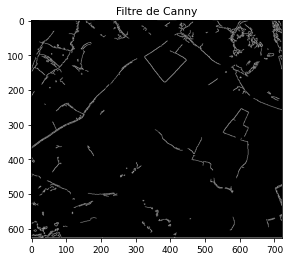

In [39]:
plt.title('Filtre de Canny')
plt.imshow(edges, cmap='gray')
plt.show()

# Gabor Filter

In [40]:
# Gabor Filter

def build_filters():
    """ returns a list of kernels in several orientations
    """
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 32):
        params = {'ksize':(ksize, ksize), 'sigma':1.0, 'theta':theta, 'lambd':15.0,
                  'gamma':0.02, 'psi':0, 'ktype':cv2.CV_32F}
        kern = cv2.getGaborKernel(**params)
        kern /= 1.5*kern.sum()
        filters.append((kern,params))
    return filters

In [41]:
def process(img, filters):
    """ returns the img filtered by the filter list
    """
    accum = np.zeros_like(img)
    for kern,params in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

In [42]:
img = io.imread('Images/test2.jpg') 
filters = build_filters()
p = process(img, filters)

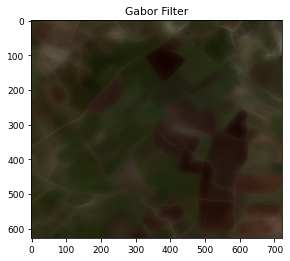

In [43]:
plt.title("Gabor Filter")
plt.imshow(p)
plt.show()